Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. 

Run your own implementation of DBSCAN on these, in two phases.

In [1]:
# load the data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# silhouette score:
from sklearn.metrics import silhouette_score

In [2]:
df_circles = pd.read_csv('circle.csv')
df_blobs = pd.read_csv('blobs.csv')
df_moons = pd.read_csv('moons.csv')

In [3]:
# Execute, point by point, the DBSCAN algorithm

# 1. Compute distances, get neighbors:

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def get_neighbors(df, point, epsilon):
    neighbors = []
    for i in range(len(df)):
        if euclidean_distance(df.iloc[i], point) < epsilon:
            neighbors.append(i)
    return neighbors

def dbscan(df, epsilon, min_points):
    labels = [0] * len(df)
    c = 0
    for i in tqdm(range(len(df))):
        if labels[i] != 0:
            continue
        neighbors = get_neighbors(df, df.iloc[i], epsilon)
        if len(neighbors) < min_points:
            labels[i] = -1
            continue
        c += 1
        labels[i] = c
        for j in neighbors:
            if labels[j] == -1:
                labels[j] = c
            if labels[j] != 0:
                continue
            labels[j] = c
            new_neighbors = get_neighbors(df, df.iloc[j], epsilon)
            if len(new_neighbors) >= min_points:
                neighbors.extend(new_neighbors)
    return labels


In [6]:
# Circles dataset:
epsilon = 0.2
min_points = 3
labels = dbscan(df_circles, epsilon, min_points)

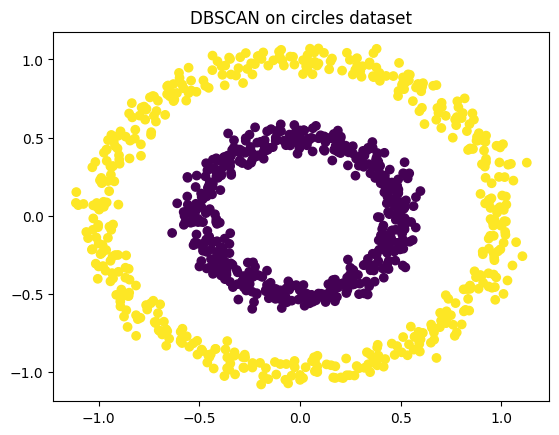

0.11343226571477871


In [ ]:
# plot the results:
plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], c=labels)
plt.title('DBSCAN on circles dataset')
plt.show()

print(silhouette_score(df_circles, labels))


In [5]:
# blobs dataset:
epsilon = 0.2
min_points = 3
labels = dbscan(df_blobs, epsilon, min_points)


100%|██████████| 1500/1500 [02:39<00:00,  9.39it/s]


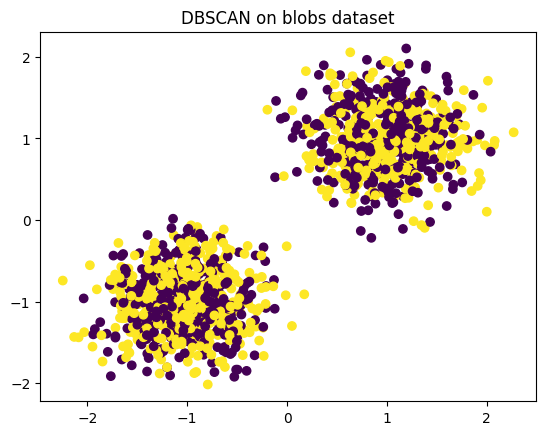

-0.0009285595434125501


In [7]:
# plot the results:
plt.scatter(df_blobs.iloc[:, 0], df_blobs.iloc[:, 1], c=labels)
plt.title('DBSCAN on blobs dataset')
plt.show()
print(silhouette_score(df_blobs, labels))

In [17]:
# lets try different hyperparameters:
    # i will inject domain knowledge (look at blobs.csv) to determine epsilon

epsilon = 0.5
min_points = 5
labels = dbscan(df_blobs, epsilon, min_points)

100%|██████████| 1500/1500 [02:33<00:00,  9.77it/s]


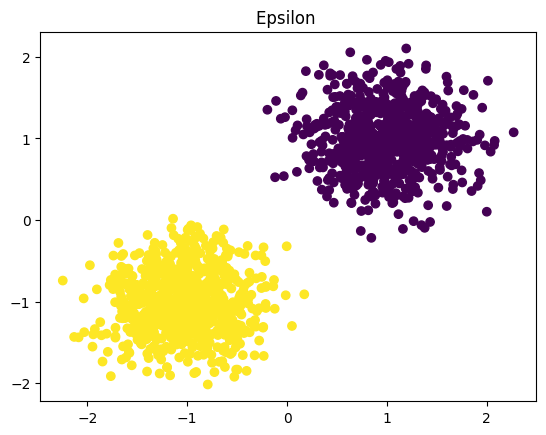

0.7565494784095866


In [18]:
plt.scatter(df_blobs.iloc[:, 0], df_blobs.iloc[:, 1], c=labels)
plt.title('Epsilon ')
plt.show()
print(silhouette_score(df_blobs, labels))

In [ ]:
# moons dataset:
epsilon = 0.2
min_points = 3
labels = dbscan(df_moons, epsilon, min_points)


100%|██████████| 1500/1500 [02:32<00:00,  9.84it/s]


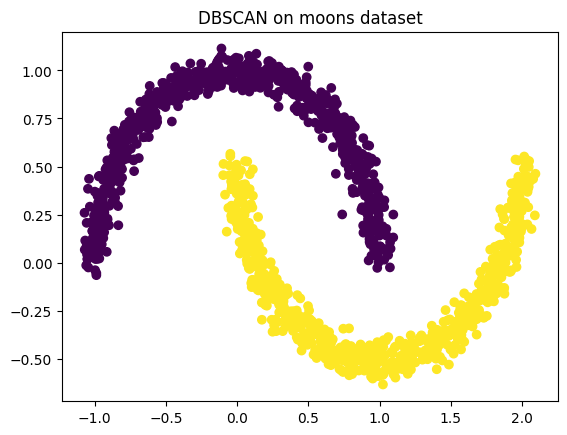

0.33600871323530146


In [11]:
# plot
plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], c=labels)
plt.title('DBSCAN on moons dataset')
plt.show()
print(silhouette_score(df_moons, labels))